## Ensemble

* I will be implementing 3 Ensemble models which are listed below:

**1) Random Forest (Bagging)**  
**2) XGBoost (Boosting)**  
**3) AdaBoost (Boosting)**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/Users/Intel/Desktop/spring 2025/ML/ML_FINAL_PROJECT/Train_Preprocessed.csv')

In [3]:
df.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,date,Unemployment_Rate,Credit_Score
0,2022-01-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2022-01-01,4.0,Good
1,2022-02-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,...,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2022-02-01,3.8,Good
2,2022-03-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2022-03-01,3.7,Good
3,2022-04-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,...,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2022-04-01,3.7,Good
4,2022-05-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,...,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2022-05-01,3.6,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [5]:
df = df.drop('Month', axis=1)

In [6]:
# Assuming df is your DataFrame
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

#### 1) Random Forest (Bagging)

In [7]:
df1 = df.copy()

# Display the resulting DataFramed
df1.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,date,Unemployment_Rate,Credit_Score
0,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,7.0,...,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2022-01-01,4.0,Good
1,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,6.0,...,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2022-02-01,3.8,Good
2,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,7.0,...,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2022-03-01,3.7,Good
3,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,4.0,...,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2022-04-01,3.7,Good
4,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,6.0,...,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2022-05-01,3.6,Good


In [8]:
# Label Encoding
label_encoder = LabelEncoder()

df1['Credit_Mix'] = label_encoder.fit_transform(df1['Credit_Mix'])
df1['Payment_of_Min_Amount'] = label_encoder.fit_transform(df1['Payment_of_Min_Amount'])
df1['Payment_Behaviour'] = label_encoder.fit_transform(df1['Payment_Behaviour'])

In [9]:
# Perform one-hot encoding on the specified columns
one_hot_encoded = pd.get_dummies(df1[['Occupation', 'Type_of_Loan']], prefix=['Occupation', 'LoanType'])

# Concatenate the new one-hot encoded columns with the original DataFrame
df1 = pd.concat([df1, one_hot_encoded], axis=1)

# Drop the original columns that were one-hot encoded
df1.drop(['Occupation', 'Type_of_Loan'], axis=1, inplace=True)

In [10]:
df1.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,"LoanType_Not Specified, Personal Loan","LoanType_Not Specified, Personal Loan, Student Loan","LoanType_Not Specified, Student Loan",LoanType_Payday Loan,"LoanType_Payday Loan, Personal Loan","LoanType_Payday Loan, Personal Loan, Student Loan","LoanType_Payday Loan, Student Loan",LoanType_Personal Loan,"LoanType_Personal Loan, Student Loan",LoanType_Student Loan
0,23,19114.12,3.0,4.0,3,4,3.000000,7.0,11.27,4.0,...,False,False,False,False,False,False,False,False,False,False
1,23,19114.12,3.0,4.0,3,4,4.428571,6.0,11.27,4.0,...,False,False,False,False,False,False,False,False,False,False
2,23,19114.12,3.0,4.0,3,4,3.000000,7.0,10.27,4.0,...,False,False,False,False,False,False,False,False,False,False
3,23,19114.12,3.0,4.0,3,4,5.000000,4.0,6.27,4.0,...,False,False,False,False,False,False,False,False,False,False
4,23,19114.12,3.0,4.0,3,4,6.000000,6.0,11.27,4.0,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Split df1 into X (features) and y (target variable)
X = df1.drop(columns=['Credit_Score'])  # Drop 'Credit_Score' from features
y = df1['Credit_Score']  # Keep 'Credit_Score' as target variable

In [12]:
y = y.map({'Good': 0, 'Standard':2, 'Poor': 1})

In [17]:
# Convert 'date' column to datetime
X['date'] = pd.to_datetime(X['date'])

# Extract year and month
X['year'] = X['date'].dt.year
X['month'] = X['date'].dt.month

# Drop original 'date' column
X = X.drop(columns=['date'])


In [18]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)



/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [19]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.56%


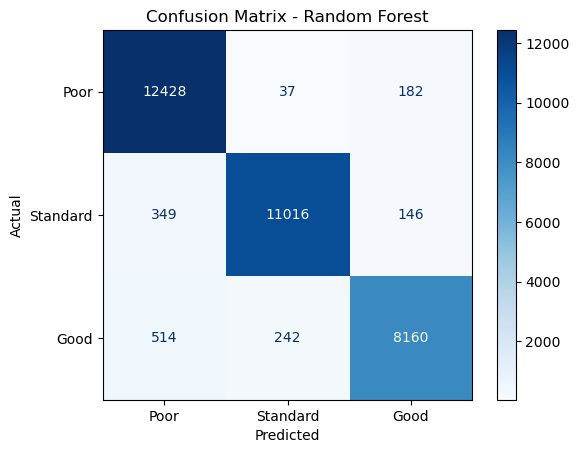

In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
conf_matrix

array([[12428,    37,   182],
       [  349, 11016,   146],
       [  514,   242,  8160]])

In [22]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12647
           1       0.98      0.96      0.97     11511
           2       0.96      0.92      0.94      8916

    accuracy                           0.96     33074
   macro avg       0.96      0.95      0.95     33074
weighted avg       0.96      0.96      0.96     33074



#### 2) XGBoost (Boosting)

In [23]:
df2 = df.copy()

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

In [25]:
df2.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,date,Unemployment_Rate,Credit_Score
0,-0.95713,Scientist,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",-1.220342,-1.011086,...,-1.067562,0.439717,No,-0.497038,-0.709737,High_spent_Small_value_payments,-0.380916,2022-01-01,2.151657,Good
1,-0.95713,Scientist,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",-1.123985,-1.170717,...,-0.066489,0.469814,No,-0.497038,-0.390631,Low_spent_Large_value_payments,-0.571768,2022-02-01,0.774597,Good
2,-0.95713,Scientist,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",-1.220342,-1.011086,...,-0.718376,0.459782,No,-0.497038,-0.698914,Low_spent_Medium_value_payments,-0.252728,2022-03-01,0.086066,Good
3,-0.95713,Scientist,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",-1.085442,-1.489979,...,-0.177318,0.469814,No,-0.497038,0.293494,Low_spent_Small_value_payments,-0.990787,2022-04-01,0.086066,Good
4,-0.95713,Scientist,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",-1.017993,-1.170717,...,-1.463366,0.479846,No,-0.497038,-1.038368,High_spent_Medium_value_payments,-0.182323,2022-05-01,-0.602464,Good


In [26]:
# Label Encoding
label_encoder = LabelEncoder()

df2['Credit_Mix'] = label_encoder.fit_transform(df2['Credit_Mix'])
df2['Payment_of_Min_Amount'] = label_encoder.fit_transform(df2['Payment_of_Min_Amount'])
df2['Payment_Behaviour'] = label_encoder.fit_transform(df2['Payment_Behaviour'])

In [27]:
# Perform one-hot encoding on the specified columns
#one_hot_encoded = pd.get_dummies(df2[['Occupation', 'Type_of_Loan']], prefix=['Occupation', 'LoanType'])

one_hot_encoded = pd.get_dummies(df2[['Occupation']], prefix=['Occupation'])

# Concatenate the new one-hot encoded columns with the original DataFrame
df2 = pd.concat([df2, one_hot_encoded], axis=1)

# Drop the original columns that were one-hot encoded
df2.drop(['Occupation', 'Type_of_Loan'], axis=1, inplace=True)

In [28]:
df2.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,0.129931,-0.461511,...,False,False,False,False,False,False,False,True,False,False
1,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.123985,-1.170717,0.129931,-0.461511,...,False,False,False,False,False,False,False,True,False,False
2,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,-0.017473,-0.461511,...,False,False,False,False,False,False,False,True,False,False
3,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.085442,-1.489979,-0.607090,-0.461511,...,False,False,False,False,False,False,False,True,False,False
4,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.017993,-1.170717,0.129931,-0.461511,...,False,False,False,False,False,False,False,True,False,False


In [29]:
# Split df1 into X (features) and y (target variable)
X = df2.drop(columns=['Credit_Score'])  # Drop 'Credit_Score' from features
y = df2['Credit_Score']  # Keep 'Credit_Score' as target variable

In [30]:
y = y.map({'Good': 0, 'Standard':2, 'Poor': 1})

In [42]:
# Drop all possible datetime-related columns (including anything leftover)
X_final = X_cleaned.select_dtypes(include=['number']).copy()
y_final = y.copy()

# Confirm shapes before resampling
print("Before SMOTEENN:", X_final.shape, y_final.shape)

# Now apply SMOTEENN
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_final, y_final)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

print("After SMOTEENN:", X_resampled.shape, y_resampled.shape)


Before SMOTEENN: (100000, 20) (100000,)


/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


After SMOTEENN: (110540, 20) (110540,)


In [43]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")

/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:05:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 93.03%


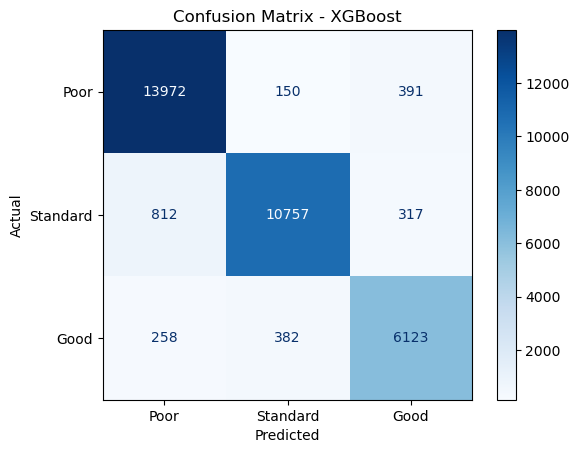

In [44]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
conf_matrix

array([[13972,   150,   391],
       [  812, 10757,   317],
       [  258,   382,  6123]])

In [46]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14513
           1       0.95      0.91      0.93     11886
           2       0.90      0.91      0.90      6763

    accuracy                           0.93     33162
   macro avg       0.93      0.92      0.92     33162
weighted avg       0.93      0.93      0.93     33162



#### 3) AdaBoost (Boosting)

In [47]:
# Initialize AdaBoost model without base_estimator argument
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy * 100:.2f}%")

AdaBoost Accuracy: 82.46%


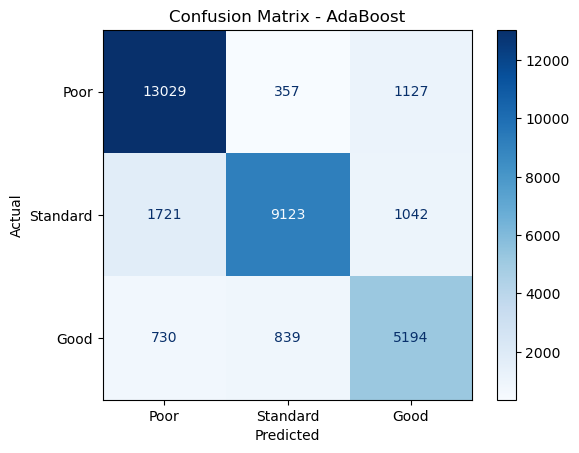

In [48]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     14513
           1       0.88      0.77      0.82     11886
           2       0.71      0.77      0.74      6763

    accuracy                           0.82     33162
   macro avg       0.81      0.81      0.81     33162
weighted avg       0.83      0.82      0.82     33162



In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)]
}

# Initialize AdaBoost
adaboost_model = AdaBoostClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1, 'n_estimators': 200}
Best score: 0.8682054606622124


In [51]:
# Initialize AdaBoost with the best parameters
base_estimator = DecisionTreeClassifier(max_depth=3)
adaboost_model = AdaBoostClassifier(estimator=base_estimator, learning_rate=0.1, n_estimators=200, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = adaboost_model.score(X_train, y_train)
test_accuracy = adaboost_model.score(X_test, y_test)

print(f"AdaBoost Model - Training Accuracy: {train_accuracy*100:.2f}%")
print(f"AdaBoost Model - Test Accuracy: {test_accuracy*100:.2f}%")

AdaBoost Model - Training Accuracy: 85.02%
AdaBoost Model - Test Accuracy: 85.28%


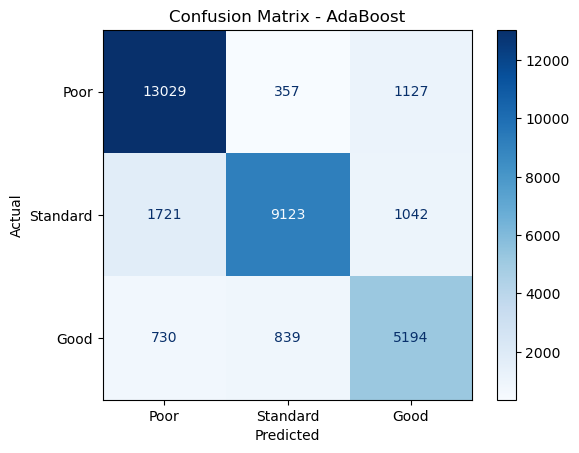

In [52]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
conf_matrix

array([[13029,   357,  1127],
       [ 1721,  9123,  1042],
       [  730,   839,  5194]])

In [54]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     14513
           1       0.88      0.77      0.82     11886
           2       0.71      0.77      0.74      6763

    accuracy                           0.82     33162
   macro avg       0.81      0.81      0.81     33162
weighted avg       0.83      0.82      0.82     33162

